# Case Study
## by Yassin Rostom


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

base_color =sns.color_palette()[0]

## Discover and understand dataset

In [2]:
df = pd.read_csv('BGL-Data.csv') # Read a csv file into DataFrame.
df.head()                        # Display sample

,ID,Age_Band,Segment,Mosaic_Group,NCD,Vehicle_Value,Vehicle_Manufacturer,BrandA_Price,BrandA_Rank,BrandA_GoToProvider,BrandB_Price,BrandB_Rank,BrandB_GoToProvider,BrandC_Price,BrandC_Rank,BrandC_GoToProvider
0,2,45-54,B,Domestic Success,9 Years,10000-14999,Mini,213.65,24,0,205.95,15,0,321.44,65,0
1,10,35-44,A,Aspiring Homemakers,10 Years,10000-14999,Ford,762.31,52,0,712.73,39,0,733.34,45,0
2,18,35-44,B,Aspiring Homemakers,1 Year,1000-1999,Peugeot,484.97,28,0,474.05,21,0,810.97,64,0
3,26,25-34,A,Rental Hubs,1 Year,3000-4999,Toyota,3556.43,41,0,3359.80,34,0,4583.47,51,0
4,34,35-44,B,Domestic Success,19 Years,15000-19999,Ford,614.81,25,0,547.87,12,0,522.22,8,0


In [3]:
len(df) # Number of rows

150000

In [4]:
# display DataFrame inf including index dtype and columns, non-null values and memory usage.
df.info(verbose=True, null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    150000 non-null  int64  
 1   Age_Band              150000 non-null  object 
 2   Segment               150000 non-null  object 
 3   Mosaic_Group          148381 non-null  object 
 4   NCD                   150000 non-null  object 
 5   Vehicle_Value         150000 non-null  object 
 6   Vehicle_Manufacturer  150000 non-null  object 
 7   BrandA_Price          150000 non-null  float64
 8   BrandA_Rank           150000 non-null  int64  
 9   BrandA_GoToProvider   150000 non-null  int64  
 10  BrandB_Price          150000 non-null  float64
 11  BrandB_Rank           150000 non-null  int64  
 12  BrandB_GoToProvider   150000 non-null  int64  
 13  BrandC_Price          150000 non-null  float64
 14  BrandC_Rank           150000 non-null  int64  
 15  

In [5]:
# Determine sum of duplicates
df.duplicated().sum() 

0

#### No duplicates! that's good

In [6]:
# Generate descriptive statistics for object data type
df.describe(include=[object])

,Age_Band,Segment,Mosaic_Group,NCD,Vehicle_Value,Vehicle_Manufacturer
count,150000,150000,148381,150000,150000,150000
unique,6,3,15,20,10,57
top,25-34,A,Aspiring Homemakers,9 Years,5000-7499,Ford
freq,46259,97229,23330,20910,25862,22344


In [7]:
# Generate descriptive statistics for int and Float data type
df.describe()

,ID,BrandA_Price,BrandA_Rank,BrandA_GoToProvider,BrandB_Price,BrandB_Rank,BrandB_GoToProvider,BrandC_Price,BrandC_Rank,BrandC_GoToProvider
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,752.155899,31.267473,0.026693,703.285704,23.187167,0.176320,666.014728,29.648047,0.130320
std,43301.414527,646.658259,17.854658,0.161186,619.382110,16.317605,0.381093,513.574146,22.990958,0.336656
min,1.000000,93.370000,1.000000,0.000000,92.170000,1.000000,0.000000,240.920000,1.000000,0.000000
25%,37500.750000,329.580000,17.000000,0.000000,308.740000,10.000000,0.000000,325.507500,8.000000,0.000000
50%,75000.500000,532.800000,30.000000,0.000000,491.035000,20.000000,0.000000,488.710000,26.000000,0.000000
75%,112500.250000,941.720000,44.000000,0.000000,868.472500,34.000000,0.000000,797.512500,49.000000,0.000000
max,150000.000000,4999.310000,90.000000,1.000000,4986.890000,87.000000,1.000000,4920.450000,90.000000,1.000000


In [8]:
# 0.7 to 0.9 (+ or -) indicates a strong correlation. 
# 0.5 to 0.7 moderate correlation. 
# 0.3 to 0.5 weak correlation. 
# 0 to 0.3 negligible correlation

df.BrandA_Price.corr(df.BrandA_GoToProvider)

-0.12333974625657736

##  Data Cleansing

In [9]:
df_clean = df.copy()

In [10]:
df.Mosaic_Group.unique() # return unique values of Mosaic Group

array(['Domestic Success', 'Aspiring Homemakers', 'Rental Hubs',
       'Modest Traditions', 'Suburban Stability', 'Family Basics',
       'Transient Renters', 'Urban Cohesion', 'Rural Reality',
       'Vintage Value', 'Country Living', 'Senior Security',
       'Prestige Positions', 'City Prosperity', 'Municipal Challenge',
       nan], dtype=object)

In [14]:
df.Vehicle_Value.unique() # return unique values of Vehicle Value

array(['10000-14999', '1000-1999', '3000-4999', '15000-19999', '0-499',
       '5000-7499', '2000-2999', '7500-9999', '500-999', '20000+'],
      dtype=object)

In [17]:
# Enrich dataset by adding GoToProvider_Price column
def fgtp(r):
    if r['BrandA_GoToProvider'] == 1:
        val = r['BrandA_Price']
        return val
    if r['BrandB_GoToProvider'] == 1:
        val =r['BrandB_Price']
        return val
    if r['BrandC_GoToProvider'] == 1:
        val =r['BrandC_Price']
        return val
    else:
        val = None
        return val

# Add column vechicle_category to Dataframe df_clean
df_clean['GoToProvider_Price'] = df.apply(fgtp, axis=1)

df_clean.head() # Display sample

,ID,Age_Band,Segment,Mosaic_Group,NCD,Vehicle_Value,Vehicle_Manufacturer,BrandA_Price,BrandA_Rank,BrandA_GoToProvider,...,BrandB_GoToProvider,BrandC_Price,BrandC_Rank,BrandC_GoToProvider,kf1,kf2,kf3,vehicle_category,GoToProvider,GoToProvider_Price
0,2,45-54,B,Domestic Success,9 Years,10000-14999,Mini,213.65,24,0,...,0,321.44,65,0,Families with children,Upmarket suburban homes,Owned with a mortgage,8,None,NaN
1,10,35-44,A,Aspiring Homemakers,10 Years,10000-14999,Ford,762.31,52,0,...,0,733.34,45,0,Younger households,Full-time employment,Private suburbs,8,None,NaN
2,18,35-44,B,Aspiring Homemakers,1 Year,1000-1999,Peugeot,484.97,28,0,...,0,810.97,64,0,Younger households,Full-time employment,Private suburbs,3,None,NaN
3,26,25-34,A,Rental Hubs,1 Year,3000-4999,Toyota,3556.43,41,0,...,0,4583.47,51,0,Aged 18-35,Private renting,Singles and sharers,5,None,NaN
4,34,35-44,B,Domestic Success,19 Years,15000-19999,Ford,614.81,25,0,...,0,522.22,8,0,Families with children,Upmarket suburban homes,Owned with a mortgage,9,None,NaN


In [18]:
# Generate descriptive statistics for object data type
df_clean.describe(include=[object])

,Age_Band,Segment,Mosaic_Group,NCD,Vehicle_Value,Vehicle_Manufacturer,kf1,kf2,kf3,GoToProvider
count,150000,150000,148381,150000,150000,150000,150000,150000,150000,50000
unique,6,3,15,20,10,57,14,15,16,3
top,25-34,A,Aspiring Homemakers,9 Years,5000-7499,Ford,Families with children,Full-time employment,Private suburbs,B
freq,46259,97229,23330,20910,25862,22344,29596,23330,23330,26448


In [19]:
# Clean and transform NCD Column 
df_clean['NCD'] = df_clean['NCD'].str.replace(r' Years', '')
df_clean['NCD'] = df_clean['NCD'].str.replace(r' Year', '')
df_clean['NCD'] = df_clean['NCD'].str.replace(r'+', '')
# Convert String into int
df_clean['NCD'] = df_clean['NCD'].astype(int)

In [20]:
df_clean.NCD.unique()

array([ 9, 10,  1, 19, 11, 17,  5,  2,  3,  7, 20,  4,  8,  6, 16, 15, 12,
       14, 13, 18])

# Data Insights

## Insight 1: Age vs BrandX_Provider

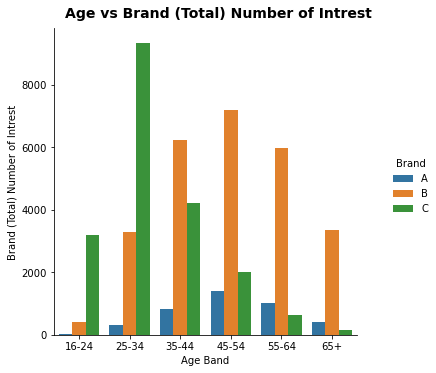

In [21]:
labels = ['16-24','25-34', '35-44','45-54' , '55-64', '65+'] # Age labels

# categorical Plot: Show the relationship between a numerical and one or more categorical variables.
g = sns.catplot(data=df_clean, x='Age_Band', hue="GoToProvider", kind='count', order = labels, hue_order= ["A","B","C"])
g.set_axis_labels("Age Band", "Brand (Total) Number of Intrest")
g._legend.set_title('Brand')
g.fig.suptitle('Age vs Brand (Total) Number of Intrest', y=1.03, fontsize=14, fontweight='semibold');

In [22]:
Age_BrandA_Max = df_clean[(df_clean["GoToProvider"] == "A") & (df_clean["Age_Band"] == "45-54")]["ID"].count()
Age_BrandB_Max = df_clean[(df_clean["GoToProvider"] == "B") & (df_clean["Age_Band"] == "45-54")]["ID"].count()
Age_BrandC_Max = df_clean[(df_clean["GoToProvider"] == "C") & (df_clean["Age_Band"] == "25-34")]["ID"].count()
print(f"Brand A Max: {Age_BrandA_Max} at age '45-54'\n"
      f"Brand B Max: {Age_BrandB_Max} at age '45-54'\n"
      f"Brand C Max: {Age_BrandC_Max} at age '25-34'")

Brand A Max: 1414 at age '45-54'
Brand B Max: 7201 at age '45-54'
Brand C Max: 9336 at age '25-34'


## Insight 2: Brand Intrest Rate

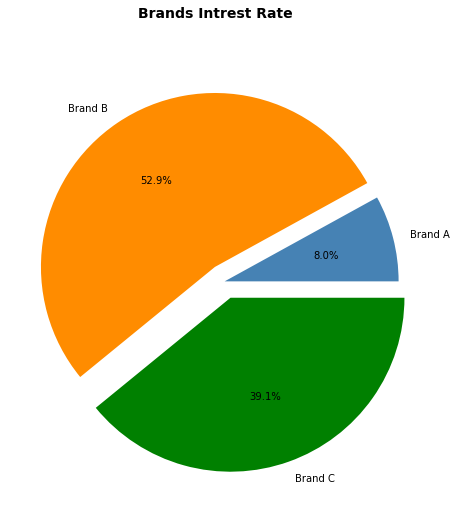

In [23]:
# Count intrest of each brand
a_event = df_clean[df_clean['GoToProvider']=='A'].GoToProvider.count()
b_event = df_clean[df_clean['GoToProvider']=='B'].GoToProvider.count()
c_event = df_clean[df_clean['GoToProvider']=='C'].GoToProvider.count()

# Total brands intrest
Total_GoToProvider = a_event + b_event + c_event

plt.figure(figsize = [10, 8])

# Determine intrest rate wrt (total) all brands intrest 
BrandA_P= a_event/Total_GoToProvider
BrandB_P= b_event/Total_GoToProvider
BrandC_P = c_event/Total_GoToProvider
 
# pie chart
labels = ['Brand A', 'Brand B','Brand C']
sizes = [BrandA_P,BrandB_P,BrandC_P]
colors = ['steelblue','darkorange','green']
explode = (0, 0.1,0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors, autopct='%1.1f%%')

plt.suptitle('Brands Intrest Rate', fontsize=14, fontweight='semibold');

In [24]:
print(f"Total Number of interest on Brand A B C: {Total_GoToProvider}\n"
      f"Number of interest on Brand A: {a_event}\n"
      f"Number of interest on Brand B: {b_event}\n"
      f"Number of interest on Brand A: {c_event}\n")

Total Number of interest on Brand A B C: 50000
Number of interest on Brand A: 4004
Number of interest on Brand B: 26448
Number of interest on Brand A: 19548



## Insight 3: Segment vs BrandX_Provider

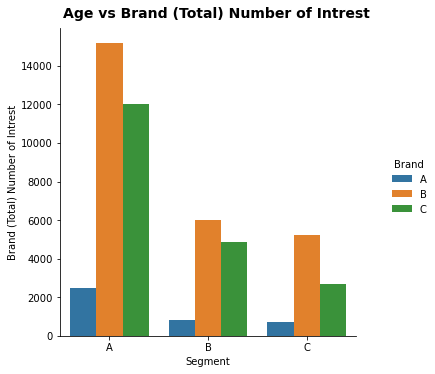

In [25]:
labels = ['A','B', 'C'] # Segment labels

g = sns.catplot(data=df_clean, x='Segment', hue="GoToProvider", kind='count', order = labels,hue_order= ["A","B","C"])
g.set_axis_labels("Segment", "Brand (Total) Number of Intrest")
g._legend.set_title('Brand')
g.fig.suptitle('Age vs Brand (Total) Number of Intrest', y=1.03, fontsize=14, fontweight='semibold');

In [26]:
# Segment A
segmentA_BrandA_Max = df_clean[(df_clean["GoToProvider"] == "A") & (df_clean["Segment"] == "A")]["ID"].count()
segmentA_BrandB_Max = df_clean[(df_clean["GoToProvider"] == "B") & (df_clean["Segment"] == "A")]["ID"].count()
segmentA_BrandC_Max = df_clean[(df_clean["GoToProvider"] == "C") & (df_clean["Segment"] == "A")]["ID"].count()

# Segment B
segmentB_BrandA_Max = df_clean[(df_clean["GoToProvider"] == "A") & (df_clean["Segment"] == "B")]["ID"].count()
segmentB_BrandB_Max = df_clean[(df_clean["GoToProvider"] == "B") & (df_clean["Segment"] == "B")]["ID"].count()
segmentB_BrandC_Max = df_clean[(df_clean["GoToProvider"] == "C") & (df_clean["Segment"] == "B")]["ID"].count()

# Segment C
segmentC_BrandA_Max = df_clean[(df_clean["GoToProvider"] == "A") & (df_clean["Segment"] == "C")]["ID"].count()
segmentC_BrandB_Max = df_clean[(df_clean["GoToProvider"] == "B") & (df_clean["Segment"] == "C")]["ID"].count()
segmentC_BrandC_Max = df_clean[(df_clean["GoToProvider"] == "C") & (df_clean["Segment"] == "C")]["ID"].count()

# Segment A % of Intrest
segmentA = ((segmentA_BrandA_Max + segmentA_BrandB_Max + segmentA_BrandC_Max)/Total_GoToProvider)*100

# Segment B % of Intrest
segmentB = ((segmentB_BrandA_Max + segmentB_BrandB_Max + segmentB_BrandC_Max)/Total_GoToProvider)*100

# Segment C % of Intrest
segmentC = ((segmentC_BrandA_Max + segmentC_BrandB_Max + segmentC_BrandC_Max)/Total_GoToProvider)*100

print(f"Brand A Max: {segmentA_BrandA_Max} at segment A\n"
      f"Brand B Max: {segmentA_BrandB_Max} at segment A\n"
      f"Brand C Max: {segmentA_BrandC_Max} at segment A\n\n"
      f"Segment A % of Intrest: {segmentA:.2f}%\n"
      f"Segment B % of Intrest: {segmentB:.2f}%\n"
      f"Segment C % of Intrest: {segmentC:.2f}%\n")

Brand A Max: 2490 at segment A
Brand B Max: 15187 at segment A
Brand C Max: 12003 at segment A

Segment A % of Intrest: 59.36%
Segment B % of Intrest: 23.36%
Segment C % of Intrest: 17.28%



## Insight 4: Mosaic Group vs BrandX_Provider

In [27]:
# Sort Mosaic Group Labels
labels = ['Domestic Success', 'Aspiring Homemakers', 'Rental Hubs',
       'Modest Traditions', 'Suburban Stability', 'Family Basics',
       'Transient Renters', 'Urban Cohesion', 'Rural Reality',
       'Vintage Value', 'Country Living', 'Senior Security',
       'Prestige Positions', 'City Prosperity', 'Municipal Challenge'] # List of Mosaic Groups

labels_values = [] # placeholder

for i in range(len(labels)):
    labels_values.append(df_clean[(df_clean["GoToProvider"] != None) & 
                                  (df_clean["Mosaic_Group"] == labels[i])]["ID"].count())
labels_sorted = [x for _,x in sorted(zip(labels_values,labels),reverse=True)]

print(*labels_sorted,sep = "\n")

Aspiring Homemakers
Domestic Success
Family Basics
Suburban Stability
Rural Reality
Senior Security
Modest Traditions
Prestige Positions
Transient Renters
Country Living
Rental Hubs
Vintage Value
Municipal Challenge
Urban Cohesion
City Prosperity


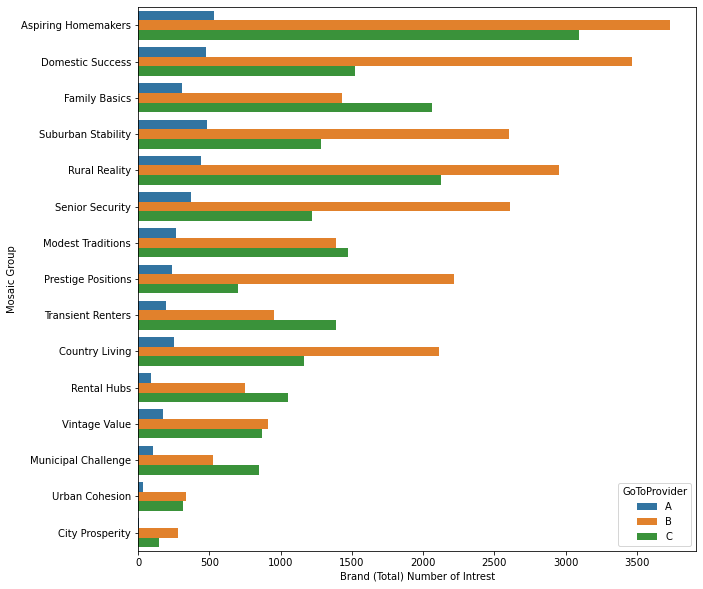

In [28]:
plt.figure(figsize = [10, 10]) # figure size
graph = sns.countplot(data=df_clean, y='Mosaic_Group', hue="GoToProvider", order=labels_sorted ,hue_order= ["A","B","C"])
graph_label = graph.set(xlabel="Brand (Total) Number of Intrest", ylabel = "Mosaic Group")

## Insight 5: Vehicle Mfr. vs BrandX_Provider

In [59]:
# Sort Vehicle Mfr Labels
Vehicle_Mfr = ['Mini', 'Ford', 'Peugeot', 'Toyota', 'Nissan', 'Audi', 'Honda',
           'MG', 'BMW', 'Dacia', 'Volkswagen', 'Mercedes-benz', 'Seat',
           'Vauxhall', 'Fiat', 'Land Rover', 'Citroen', 'Renault',
           'Chevrolet', 'Kia', 'Volvo', 'Skoda', 'Alfa Romeo', 'Jaguar',
           'Suzuki', 'Mazda', 'Porsche', 'Hyundai', 'Mitsubishi', 'Subaru',
           'Lotus', 'Dodge', 'Chrysler', 'Smart', 'Saab', 'Ds', 'Jeep',
           'Lexus', 'Infiniti', 'Rover', 'Ssangyong', 'Mg-motor UK', 'Daewoo',
           'Micro Car', 'Daihatsu', 'Proton', 'Perodua', 'Isuzu', 'Daimler',
           'Cadillac', 'Opel', 'Aixam', 'Tvr', 'Alpina', 'Tata', 'Reliant',
           'Maserati']

# placeholder
Vehicle_Mfr_updated = []
Vehicle_Mfr_sav = [] 

for i in range(len(Vehicle_Mfr)):
    Vehicle_Mfr_count = df_clean[(df_clean["GoToProvider"] != None) & 
                       (df_clean["Vehicle_Manufacturer"] == Vehicle_Mfr[i])]["ID"].count()
 
    if (Vehicle_Mfr_count < 50) or (Vehicle_Mfr_count > 5000):
        Vehicle_Mfr_updated.append(Vehicle_Mfr[i])
        Vehicle_Mfr_sav.append(Vehicle_Mfr_count)
    else:
        pass
    
Vehicle_Mfr_sorted = [x for _,x in sorted(zip(Vehicle_Mfr_sav,Vehicle_Mfr_updated),reverse=True)]
length = len(Vehicle_Mfr_sorted)

print(*Vehicle_Mfr_sorted,sep = ", ")
print(f"\nLength = {length}")

Ford, Vauxhall, Volkswagen, Peugeot, BMW, Audi, Nissan, Renault, Toyota, Citroen, Honda, Daewoo, Proton, Infiniti, Lotus, Opel, Isuzu, Perodua, Tvr, Tata, Reliant, Micro Car, Maserati, Daimler, Cadillac, Alpina, Aixam

Length = 27


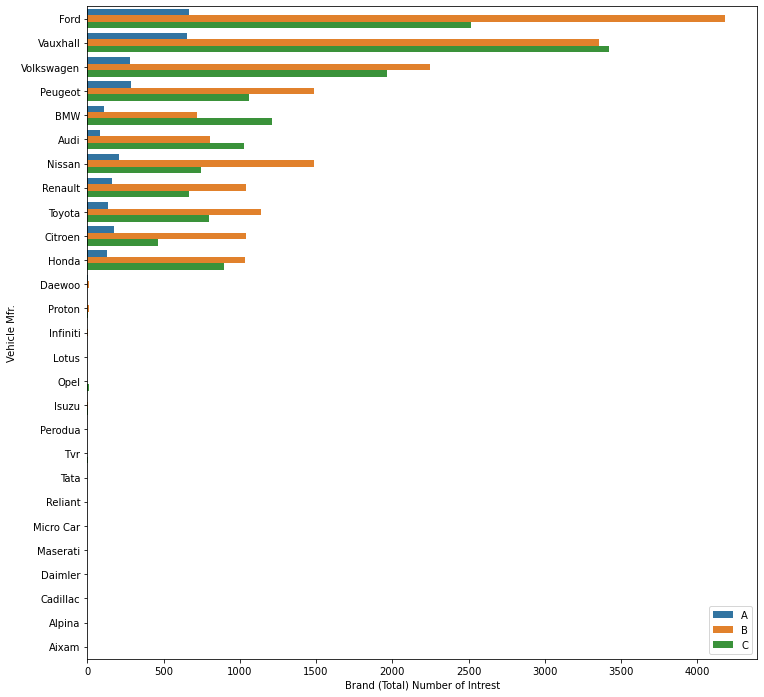

In [30]:
# Study vehicle manufacturers who have the highest or lowest interest. 
plt.figure(figsize = [12, 12]) # figure size
graph = sns.countplot(data=df_clean, y='Vehicle_Manufacturer', hue="GoToProvider", 
                      order=Vehicle_Mfr_sorted ,hue_order= ["A","B","C"])
graph_label = graph.set(xlabel="Brand (Total) Number of Intrest", ylabel = "Vehicle Mfr.")
graph_legend_loc =plt.legend(loc='lower right') # legend location

## Insight 6: Age vs BrandX_Price

In [32]:
# Calculate the average price of Brand [A,B,C] at each age range
Age_labels = ['16-24','25-34', '35-44','45-54' , '55-64', '65+']
Brand_labels = ["A","B","C"]

# place holder
BrandA_average = []
BrandB_average = []
BrandC_average = []

for m in range(len(Brand_labels)):
    for n in range(len(Age_labels)):
        BrandX_Total_Price = df_clean[(df_clean["GoToProvider"] == Brand_labels[m]) & 
                                      (df_clean["Age_Band"] == Age_labels[n])]["GoToProvider_Price"].sum()
        BrandX_count = df_clean[(df_clean["GoToProvider"] == Brand_labels[m]) & 
                                      (df_clean["Age_Band"] == Age_labels[n])]["GoToProvider_Price"].count()
        BrandX_average = round(BrandX_Total_Price/BrandX_count,2)

        if Brand_labels[m] == "A":
            BrandA_average.append(BrandX_average)
        elif Brand_labels[m] == "B":
            BrandB_average.append(BrandX_average)
        elif Brand_labels[m] == "C":
            BrandC_average.append(BrandX_average)
            
print(f"Brand A average prices: {BrandA_average}\n"
      f"Brand B average prices: {BrandB_average}\n"
      f"Brand C average prices: {BrandC_average}\n")

# Calculate the percentage decrease of each brand from Age (16-24) to Age (65+)
Brand_A_perc = round(((BrandA_average[0]-BrandA_average[5])/BrandA_average[0])*100,2)
Brand_B_perc = round(((BrandB_average[0]-BrandB_average[5])/BrandB_average[0])*100,2)
Brand_C_perc = round(((BrandC_average[0]-BrandC_average[5])/BrandC_average[0])*100,2)
print(f"Brand A % decrease: {Brand_A_perc}%\n"
      f"Brand B % decrease: {Brand_B_perc}%\n"
      f"Brand C % decrease: {Brand_C_perc}%")

Brand A average prices: [1060.46, 400.58, 298.23, 253.62, 229.45, 258.14]
Brand B average prices: [751.29, 461.65, 337.06, 277.05, 242.84, 249.73]
Brand C average prices: [649.09, 463.24, 386.9, 369.56, 367.79, 374.38]

Brand A % decrease: 75.66%
Brand B % decrease: 66.76%
Brand C % decrease: 42.32%


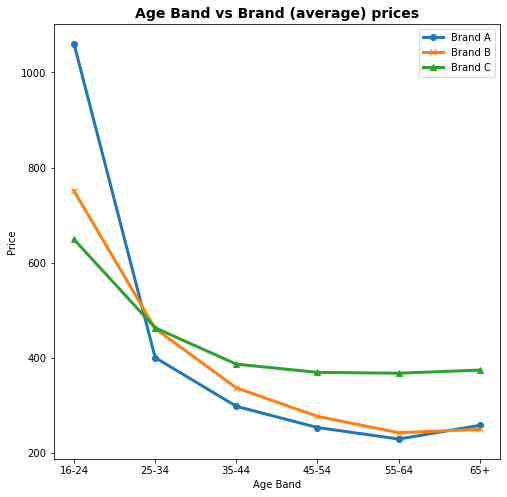

In [33]:
plt.figure(figsize = [8, 8]) # figure size
plt.plot(Age_labels,BrandA_average, label ="Brand A",linewidth=3,marker='o',markersize=6)
plt.plot(Age_labels,BrandB_average, label ="Brand B",linewidth=3,marker='x',markersize=6)
plt.plot(Age_labels,BrandC_average, label ="Brand C",linewidth=3,marker='^',markersize=6)

plt.title("Age Band vs Brand (average) prices",fontsize=14, fontweight='semibold')
plt.xlabel("Age Band")
plt.ylabel("Price")
plt.legend()
plt.show()

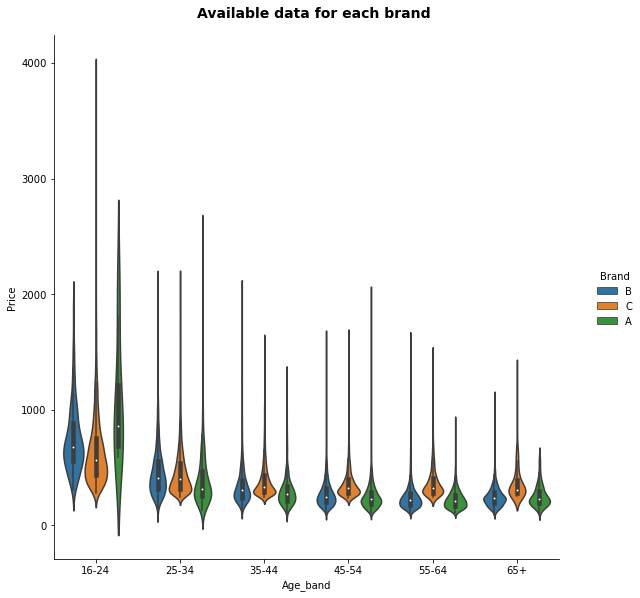

In [34]:
# Method 2 --> Represents Age Band vs Brand (average) prices
labels = ['16-24','25-34', '35-44','45-54' , '55-64', '65+']
g = sns.catplot(data=df_clean, x='Age_Band',height=8.02,y="GoToProvider_Price" ,kind="violin",
                hue="GoToProvider", sharey = False, order = labels)
g.set_axis_labels("Age_band", "Price")
g._legend.set_title('Brand')
g.fig.suptitle('Available data for each brand', y=1.03, fontsize=14, fontweight='semibold');

## Insight 7: Vehicle Value vs BrandX_Price

In [35]:
# Calculate the average price of Brand [A,B,C] at each age range
Vehicle_Value_labels = ['0-499','500-999','1000-1999','2000-2999','3000-4999','5000-7499','7500-9999',
                         '10000-14999',  '15000-19999', '20000+']
Brand_labels = ["A","B","C"]

# placeholder
BrandA_Veh_Val_avg = []
BrandB_Veh_Val_avg = []
BrandC_Veh_Val_avg = []

for m in range(len(Brand_labels)):
    for n in range(len(Vehicle_Value_labels)):
        Brand_Total_Price = df_clean[(df_clean["GoToProvider"] == Brand_labels[m]) & 
                                      (df_clean["Vehicle_Value"] == Vehicle_Value_labels[n])]["GoToProvider_Price"].sum()
        Brand_count = df_clean[(df_clean["GoToProvider"] == Brand_labels[m]) & 
                                      (df_clean["Vehicle_Value"] == Vehicle_Value_labels[n])]["GoToProvider_Price"].count()
        Brand_average = round(Brand_Total_Price/Brand_count,2)

        if Brand_labels[m] == "A":
            BrandA_Veh_Val_avg.append(Brand_average)
        elif Brand_labels[m] == "B":
            BrandB_Veh_Val_avg.append(Brand_average)
        elif Brand_labels[m] == "C":
            BrandC_Veh_Val_avg.append(Brand_average)
            
print(f"Brand A average prices: {BrandA_Veh_Val_avg}\n"
      f"Brand B average prices: {BrandB_Veh_Val_avg}\n"
      f"Brand C average prices: {BrandC_Veh_Val_avg}\n")

# Calculate the percentage change of brand from Vehicle Value (0-499) to Vehicle Value (20000+)
Brand_A_perct = round(((BrandA_Veh_Val_avg[9]-BrandA_Veh_Val_avg[0])/BrandA_Veh_Val_avg[0])*100,2)
Brand_B_perct = round(((BrandB_Veh_Val_avg[9]-BrandB_Veh_Val_avg[0])/BrandB_Veh_Val_avg[0])*100,2)
Brand_C_perct = round(((BrandC_Veh_Val_avg[9]-BrandC_Veh_Val_avg[0])/BrandC_Veh_Val_avg[0])*100,2)

print(f"Brand A % change: {Brand_A_perct}%\n"
      f"Brand B % change: {Brand_B_perct}%\n"
      f"Brand C % change: {Brand_C_perct}%")

Brand A average prices: [240.87, 246.11, 249.91, 250.21, 260.36, 300.09, 289.27, 306.72, 329.17, 329.4]
Brand B average prices: [260.3, 287.62, 281.06, 293.02, 295.88, 310.73, 325.5, 342.75, 349.6, 345.3]
Brand C average prices: [520.93, 520.82, 474.69, 444.88, 443.17, 444.52, 459.12, 468.11, 436.89, 428.52]

Brand A % change: 36.75%
Brand B % change: 32.65%
Brand C % change: -17.74%


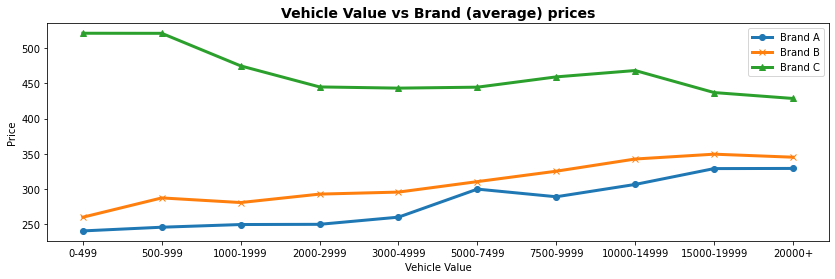

In [36]:
plt.figure(figsize = [14, 4]) # figure size
plt.plot(Vehicle_Value_labels,BrandA_Veh_Val_avg, label ="Brand A",linewidth=3,marker='o',markersize=6)
plt.plot(Vehicle_Value_labels,BrandB_Veh_Val_avg, label ="Brand B",linewidth=3,marker='x',markersize=6)
plt.plot(Vehicle_Value_labels,BrandC_Veh_Val_avg, label ="Brand C",linewidth=3,marker='^',markersize=6)

plt.title("Vehicle Value vs Brand (average) prices",fontsize=14, fontweight='semibold')
plt.xlabel("Vehicle Value")
plt.ylabel("Price")
plt.legend()
plt.show()

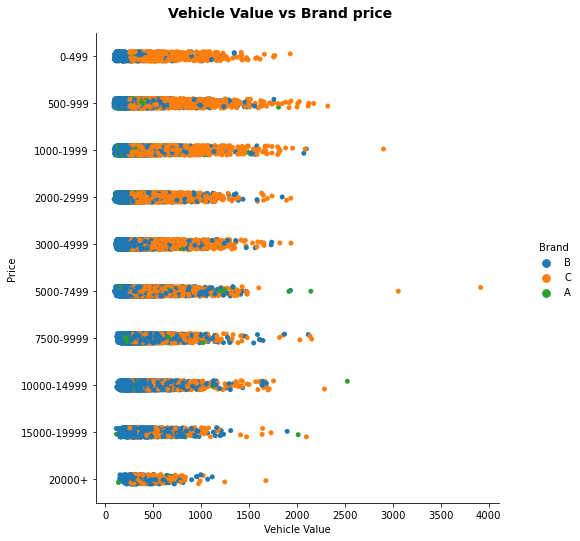

In [37]:
# Method 2 --> Represents Vehicle Value vs Brand (average) prices
labels = ['0-499','500-999','1000-1999','2000-2999','3000-4999','5000-7499','7500-9999',
          '10000-14999',  '15000-19999', '20000+']

g = sns.catplot(data=df_clean, height=7.27,y='Vehicle_Value',x="GoToProvider_Price" ,
                hue="GoToProvider", sharey = False, order = labels)
g.set_axis_labels("Vehicle Value", "Price")
g._legend.set_title('Brand')
g.fig.suptitle('Vehicle Value vs Brand price', y=1.03, fontsize=14, fontweight='semibold');

## Insight 8: NCD vs BrandX_Price

In [38]:
NCD_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Brand_labels = ["A","B","C"]

# placeholder
BrandA_NCD_avg = []
BrandB_NCD_avg = []
BrandC_NCD_avg = []

for m in range(len(Brand_labels)):
    for n in range(len(NCD_labels)):
        Brand_Total_Price = df_clean[(df_clean["GoToProvider"] == Brand_labels[m]) & 
                                      (df_clean["NCD"] == NCD_labels[n])]["GoToProvider_Price"].sum()
        Brand_count = df_clean[(df_clean["GoToProvider"] == Brand_labels[m]) & 
                                      (df_clean["NCD"] == NCD_labels[n])]["GoToProvider_Price"].count()
        Brand_average = round(Brand_Total_Price/Brand_count,2)

        if Brand_labels[m] == "A":
            BrandA_NCD_avg.append(Brand_average)
        elif Brand_labels[m] == "B":
            BrandB_NCD_avg.append(Brand_average)
        elif Brand_labels[m] == "C":
            BrandC_NCD_avg.append(Brand_average)
            
print(f"Brand A average prices: {BrandA_NCD_avg}\n"
      f"Brand B average prices: {BrandB_NCD_avg}\n"
      f"Brand C average prices: {BrandC_NCD_avg}\n")

# Calculate the percentage change of brand from Age (0-499) to Age (20000+)
Brand_A_perct = round(((BrandA_NCD_avg[9]-BrandA_NCD_avg[0])/BrandA_NCD_avg[0])*100,2)
Brand_B_perct = round(((BrandB_NCD_avg[9]-BrandB_NCD_avg[0])/BrandB_NCD_avg[0])*100,2)
Brand_C_perct = round(((BrandC_NCD_avg[9]-BrandC_NCD_avg[0])/BrandC_NCD_avg[0])*100,2)

print(f"Brand A % change: {Brand_A_perct}%\n"
      f"Brand B % change: {Brand_B_perct}%\n"
      f"Brand C % change: {Brand_C_perct}%")

Brand A average prices: [518.24, 532.14, 482.57, 478.09, 333.86, 337.44, 313.32, 305.26, 252.05, 258.09, 256.22, 269.87, 242.99, 253.96, 251.99, 253.77, 271.61, 244.3, 240.32, 231.77]
Brand B average prices: [569.95, 533.64, 475.61, 424.42, 389.32, 375.66, 354.2, 335.48, 265.04, 272.54, 276.22, 272.97, 275.68, 272.52, 265.06, 259.83, 263.73, 265.37, 266.86, 241.19]
Brand C average prices: [779.86, 628.88, 571.38, 516.34, 457.55, 430.19, 414.26, 387.85, 356.57, 356.23, 349.25, 345.2, 356.27, 355.28, 362.5, 349.12, 352.25, 341.64, 345.12, 346.52]

Brand A % change: -50.2%
Brand B % change: -52.18%
Brand C % change: -54.32%


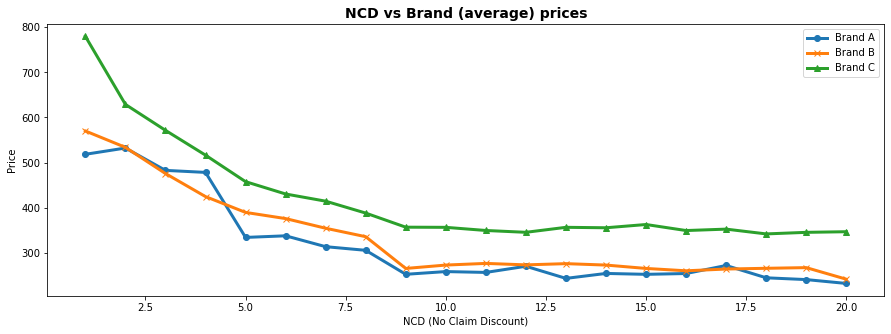

In [39]:
plt.figure(figsize = [15, 5]) # figure size
plt.plot(NCD_labels,BrandA_NCD_avg, label ="Brand A",linewidth=3,marker='o',markersize=6)
plt.plot(NCD_labels,BrandB_NCD_avg, label ="Brand B",linewidth=3,marker='x',markersize=6)
plt.plot(NCD_labels,BrandC_NCD_avg, label ="Brand C",linewidth=3,marker='^',markersize=6)

plt.title("NCD vs Brand (average) prices",fontsize=14, fontweight='semibold')
plt.xlabel("NCD (No Claim Discount)")
plt.ylabel("Price")
plt.legend()
plt.show()

## Insight 9: Age Band vs Unintrested Customers

In [40]:
# Generate a New Column "GoToProvider_None" that contains "N/A" for customers who showed no intrest
def fgtp_None(r):

    if r['BrandA_GoToProvider'] == 1:
        val = None
        return val
    elif r['BrandB_GoToProvider'] == 1:
        val = None
        return val
    elif r['BrandC_GoToProvider'] == 1:
        val = None
        return val
    else:
        val = "N/A"
        return val
    
df_clean['GoToProvider_None'] = df.apply(fgtp_None, axis=1)

df_clean.head()

,ID,Age_Band,Segment,Mosaic_Group,NCD,Vehicle_Value,Vehicle_Manufacturer,BrandA_Price,BrandA_Rank,BrandA_GoToProvider,...,BrandC_Price,BrandC_Rank,BrandC_GoToProvider,kf1,kf2,kf3,vehicle_category,GoToProvider,GoToProvider_Price,GoToProvider_None
0,2,45-54,B,Domestic Success,9,10000-14999,Mini,213.65,24,0,...,321.44,65,0,Families with children,Upmarket suburban homes,Owned with a mortgage,8,None,NaN,N/A
1,10,35-44,A,Aspiring Homemakers,10,10000-14999,Ford,762.31,52,0,...,733.34,45,0,Younger households,Full-time employment,Private suburbs,8,None,NaN,N/A
2,18,35-44,B,Aspiring Homemakers,1,1000-1999,Peugeot,484.97,28,0,...,810.97,64,0,Younger households,Full-time employment,Private suburbs,3,None,NaN,N/A
3,26,25-34,A,Rental Hubs,1,3000-4999,Toyota,3556.43,41,0,...,4583.47,51,0,Aged 18-35,Private renting,Singles and sharers,5,None,NaN,N/A
4,34,35-44,B,Domestic Success,19,15000-19999,Ford,614.81,25,0,...,522.22,8,0,Families with children,Upmarket suburban homes,Owned with a mortgage,9,None,NaN,N/A


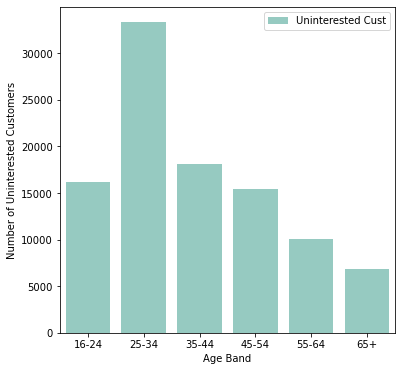

In [41]:
# Study Age band vs Unintrested Customers
Age_labels = ['16-24','25-34', '35-44','45-54' , '55-64', '65+'] # Age labels
Segment_labels = ['A','B', 'C'] # Segment labels

# Bar Chart
plt.figure(figsize = [6, 6]) # figure size
graph = sns.countplot(data=df_clean, x='Age_Band', hue="GoToProvider_None",order=Age_labels, palette="Set3")
graph_label = graph.set(xlabel="Age Band", ylabel = "Number of Uninterested Customers")
lgnd = graph.legend(["Uninterested Cust"])

## Insight 10: Segment vs Unintrested Customers

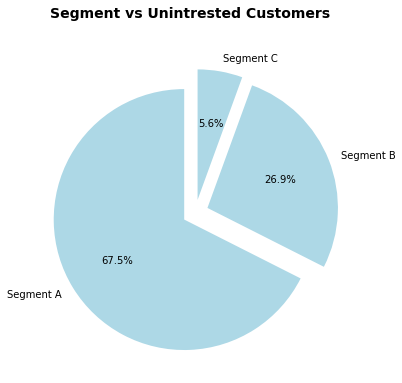

In [42]:
# Count intrest of each brand
A_seg_count = df_clean[(df_clean["GoToProvider_None"] == "N/A") & (df_clean["Segment"] == "A")]["ID"].count()
B_seg_count = df_clean[(df_clean["GoToProvider_None"] == "N/A") & (df_clean["Segment"] == "B")]["ID"].count()
C_seg_count = df_clean[(df_clean["GoToProvider_None"] == "N/A") & (df_clean["Segment"] == "C")]["ID"].count()

# Total intrest
Total = A_seg_count + B_seg_count + C_seg_count

# Determine intrest rate wrt total (all brands) intrest 
BrandA_P= A_seg_count/Total
BrandB_P= B_seg_count/Total
BrandC_P = C_seg_count/Total

plt.figure(figsize = [6, 6]) # figure size
labels = ['Segment A', 'Segment B','Segment C']
sizes = [BrandA_P,BrandB_P,BrandC_P]
colors = ['lightblue','lightblue','lightblue']
explode = (0.1, 0.1,0.1)
plt.pie(sizes, explode=explode, labels=labels, colors = colors, autopct='%1.1f%%',startangle=90)

plt.suptitle('Segment vs Unintrested Customers', fontsize=14, fontweight='semibold');

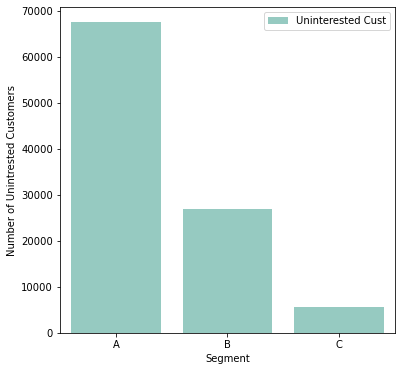

In [43]:
# Method 2 --> Represents Segment vs Not intrested Customers
# Bar Chart
plt.figure(figsize = [6, 6]) # figure size
graph = sns.countplot(data=df_clean, x='Segment', hue="GoToProvider_None",order=Segment_labels,palette="Set3")
graph_label = graph.set(xlabel="Segment", ylabel = "Number of Unintrested Customers")
lgnd = graph.legend(["Uninterested Cust"])

## Insight 11: Mosaic Group vs Uninterested Customers

In [44]:
# Sort Mosaic Group Labels
labels = ['Domestic Success', 'Aspiring Homemakers', 'Rental Hubs',
       'Modest Traditions', 'Suburban Stability', 'Family Basics',
       'Transient Renters', 'Urban Cohesion', 'Rural Reality',
       'Vintage Value', 'Country Living', 'Senior Security',
       'Prestige Positions', 'City Prosperity', 'Municipal Challenge'] # List of Mosaic Groups

# placeholder
labels_values = [] 

for i in range(len(labels)):
    labels_values.append(df_clean[(df_clean["GoToProvider_None"] == "N/A") & 
                                  (df_clean["Mosaic_Group"] == labels[i])]["ID"].count())

labels_sorted = [x for _,x in sorted(zip(labels_values,labels),reverse=True)]

print(*labels_sorted,sep = "\n")

Aspiring Homemakers
Domestic Success
Family Basics
Suburban Stability
Senior Security
Rural Reality
Modest Traditions
Prestige Positions
Transient Renters
Rental Hubs
Country Living
Vintage Value
Municipal Challenge
Urban Cohesion
City Prosperity


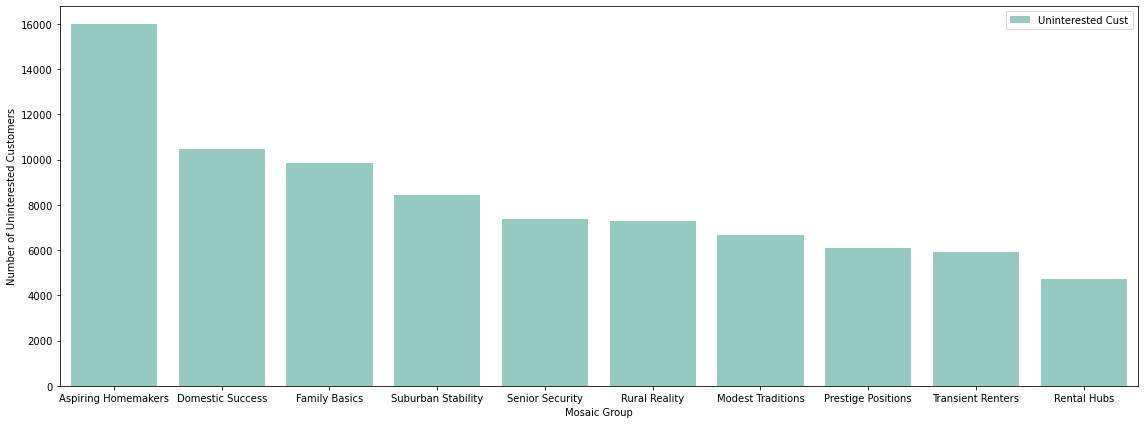

In [45]:
# Study top 10 Mosaic Groups
labels_sorted_Top10 = labels_sorted[0:10:1]  

# Bar Chart
plt.figure(figsize = [16, 6]) # figure size
graph = sns.countplot(data=df_clean, x='Mosaic_Group', hue="GoToProvider_None",order = labels_sorted_Top10,palette="Set3")
graph_label = graph.set(xlabel="Mosaic Group", ylabel = "Number of Uninterested Customers")
lgnd = graph.legend(["Uninterested Cust"])
plt.tight_layout()

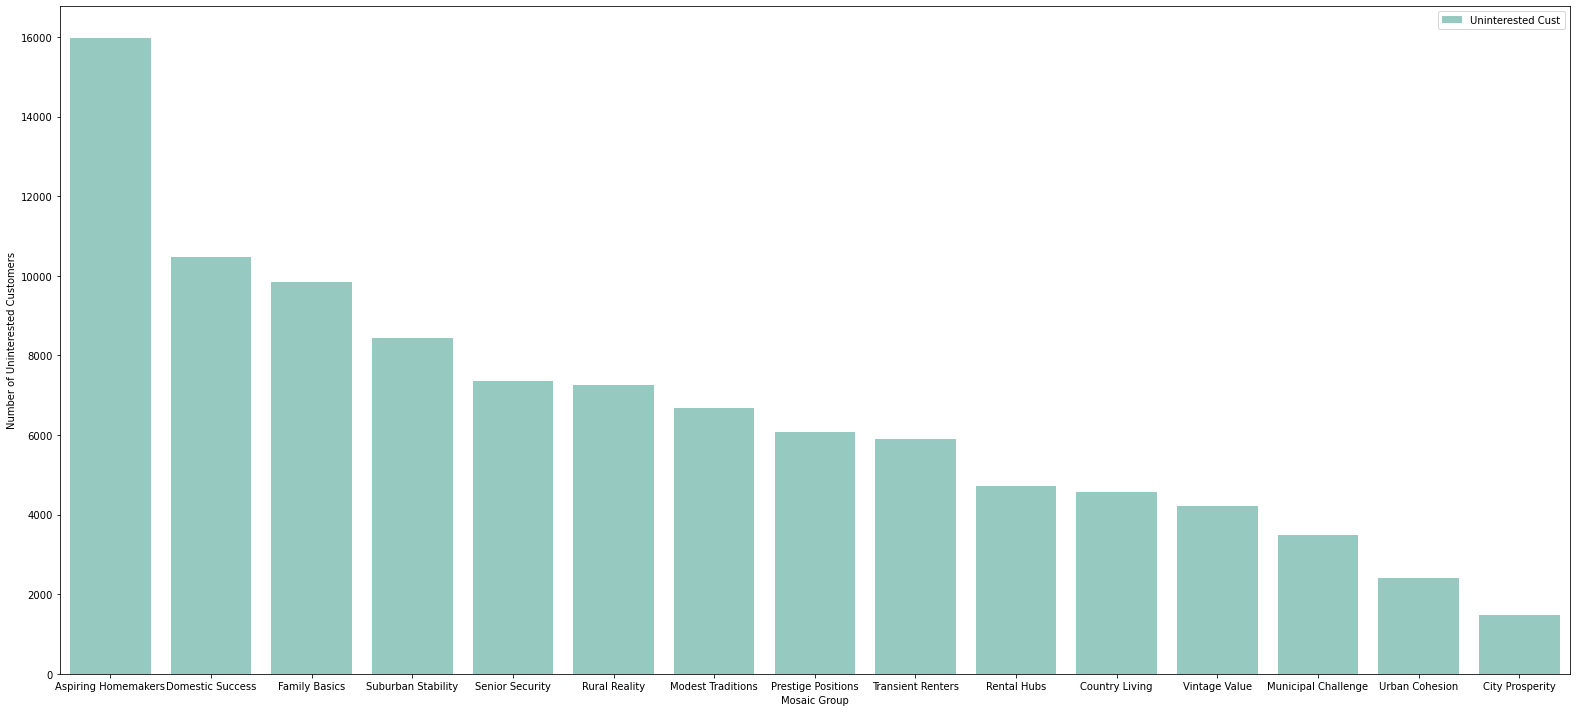

In [46]:
# Study All Mosaic Groups
# Bar Chart
plt.figure(figsize = [22, 10]) # figure size
graph = sns.countplot(data=df_clean, x='Mosaic_Group', hue="GoToProvider_None",order = labels_sorted,palette="Set3")
graph_label = graph.set(xlabel="Mosaic Group", ylabel = "Number of Uninterested Customers")
lgnd = graph.legend(["Uninterested Cust"])
plt.tight_layout()

## Insight 11: Vechile Mfr. vs Uninterested Customers

In [47]:
# Sort Vehicle Mfr Labels
Vehicle_Mfr = ['Mini', 'Ford', 'Peugeot', 'Toyota', 'Nissan', 'Audi', 'Honda',
           'MG', 'BMW', 'Dacia', 'Volkswagen', 'Mercedes-benz', 'Seat',
           'Vauxhall', 'Fiat', 'Land Rover', 'Citroen', 'Renault',
           'Chevrolet', 'Kia', 'Volvo', 'Skoda', 'Alfa Romeo', 'Jaguar',
           'Suzuki', 'Mazda', 'Porsche', 'Hyundai', 'Mitsubishi', 'Subaru',
           'Lotus', 'Dodge', 'Chrysler', 'Smart', 'Saab', 'Ds', 'Jeep',
           'Lexus', 'Infiniti', 'Rover', 'Ssangyong', 'Mg-motor UK', 'Daewoo',
           'Micro Car', 'Daihatsu', 'Proton', 'Perodua', 'Isuzu', 'Daimler',
           'Cadillac', 'Opel', 'Aixam', 'Tvr', 'Alpina', 'Tata', 'Reliant',
           'Maserati']

# placeholder
Vehicle_Mfr_updated = []
Vehicle_Mfr_sav = [] 

for i in range(len(Vehicle_Mfr)):
    Vehicle_Mfr_count = df_clean[(df_clean["GoToProvider_None"] == "N/A") & 
                       (df_clean["Vehicle_Manufacturer"] == Vehicle_Mfr[i])]["ID"].count()
 
    if (Vehicle_Mfr_count > 3000):
        Vehicle_Mfr_updated.append(Vehicle_Mfr[i])
        Vehicle_Mfr_sav.append(Vehicle_Mfr_count)
    else:
        pass
    
Vehicle_Mfr_sorted = [x for _,x in sorted(zip(Vehicle_Mfr_sav,Vehicle_Mfr_updated),reverse=True)]
length = len(Vehicle_Mfr_sorted)

print(*Vehicle_Mfr_sorted,sep = ", ")
print(f"\nLength = {length}")


Ford, Vauxhall, Volkswagen, BMW, Peugeot, Audi, Nissan, Renault, Citroen, Mercedes-benz, Toyota

Length = 11


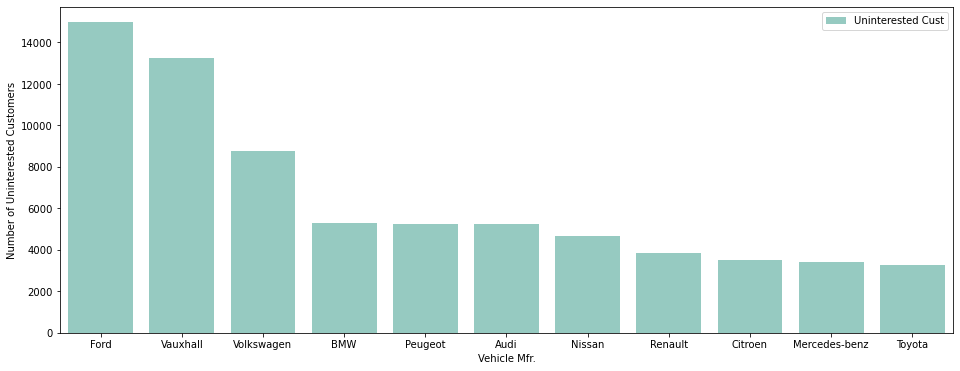

In [48]:
# Study only top 11 Vechile Manufacturer
# Bar Chart
plt.figure(figsize = [16, 6]) # figure size
graph = sns.countplot(data=df_clean, x='Vehicle_Manufacturer', hue="GoToProvider_None",
                      order = Vehicle_Mfr_sorted,palette="Set3")
graph_label = graph.set(xlabel="Vehicle Mfr.", ylabel = "Number of Uninterested Customers")
lgnd = graph.legend(["Uninterested Cust"])

## Experiments
### These analyses have not been added to the final presentation. 

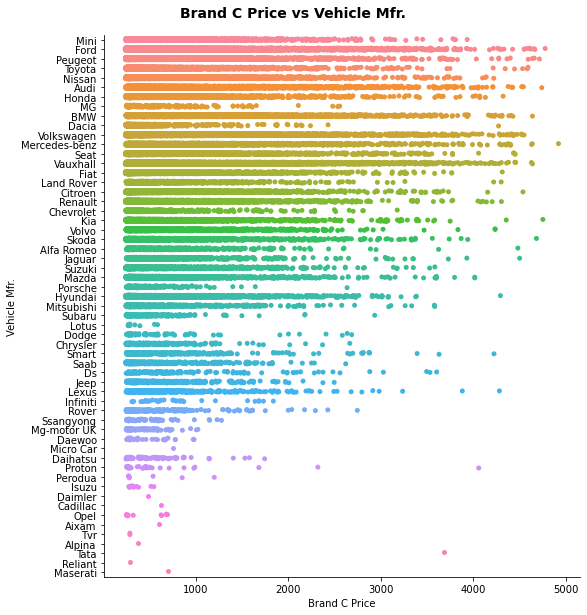

In [49]:
# Brand C Price vs Vehicle Mfr.
labels = ['Mini', 'Ford', 'Peugeot', 'Toyota', 'Nissan', 'Audi', 'Honda',
       'MG', 'BMW', 'Dacia', 'Volkswagen', 'Mercedes-benz', 'Seat',
       'Vauxhall', 'Fiat', 'Land Rover', 'Citroen', 'Renault',
       'Chevrolet', 'Kia', 'Volvo', 'Skoda', 'Alfa Romeo', 'Jaguar',
       'Suzuki', 'Mazda', 'Porsche', 'Hyundai', 'Mitsubishi', 'Subaru',
       'Lotus', 'Dodge', 'Chrysler', 'Smart', 'Saab', 'Ds', 'Jeep',
       'Lexus', 'Infiniti', 'Rover', 'Ssangyong', 'Mg-motor UK', 'Daewoo',
       'Micro Car', 'Daihatsu', 'Proton', 'Perodua', 'Isuzu', 'Daimler',
       'Cadillac', 'Opel', 'Aixam', 'Tvr', 'Alpina', 'Tata', 'Reliant',
       'Maserati']

g = sns.catplot(data=df_clean, height=8.27,x='BrandC_Price',y="Vehicle_Manufacturer" , sharey = False, order = labels)
g.set_axis_labels("Brand C Price", "Vehicle Mfr.")
g.fig.suptitle('Brand C Price vs Vehicle Mfr.', y=1.03, fontsize=14, fontweight='semibold');

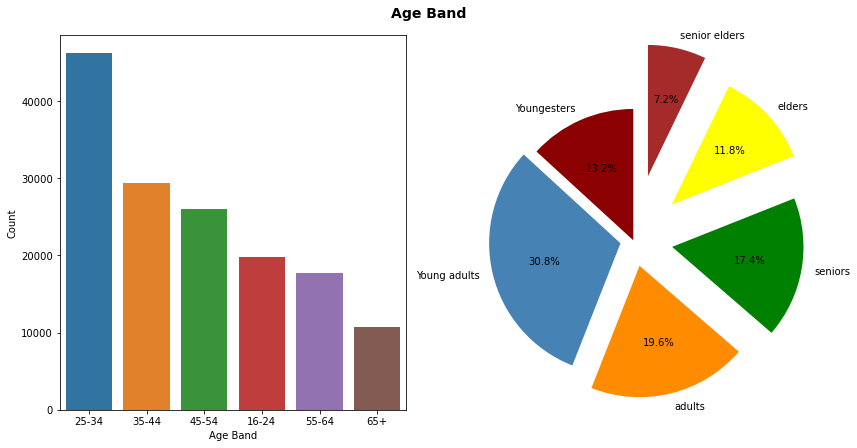

In [50]:
# Study Age Band
# determine count of each Age Band
a1 = df_clean.query('Age_Band == "16-24"')['ID'].count()
a2 = df_clean.query('Age_Band == "25-34"')['ID'].count()
a3 = df_clean.query('Age_Band == "35-44"')['ID'].count()
a4 = df_clean.query('Age_Band == "45-54"')['ID'].count()
a5 = df_clean.query('Age_Band == "55-64"')['ID'].count()
a6 = df_clean.query('Age_Band == "65+"')['ID'].count()

# determine % of each Age Band
a1_p = a1 / df_clean['ID'].count()
a2_p = a2 / df_clean['ID'].count()
a3_p = a3 / df_clean['ID'].count()
a4_p = a4 / df_clean['ID'].count()
a5_p = a5 / df_clean['ID'].count()
a6_p = a6 / df_clean['ID'].count()

plt.figure(figsize = [12, 6]) # adjust plot size

# Bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df_clean, x="Age_Band", order=df_clean.Age_Band.value_counts().index)
g.set_xlabel('Age Band')
g.set_ylabel('Count')

# Pie chart
plt.subplot(1, 2, 2)

labels = ['Youngesters', 'Young adults','adults','seniors','elders', 'senior elders']
sizes = [a1_p, a2_p,a3_p,a4_p,a5_p,a6_p]
colors = ['darkred', 'steelblue','darkorange','green','yellow','brown']
explode = (0, 0.1,0.2,0.3,0.4,0.5)
plt.pie(sizes, explode=explode, labels=labels, colors = colors,autopct='%1.1f%%', startangle=90)

# Adjust plot 
plt.suptitle('Age Band', y=1.03, fontsize=14, fontweight='semibold')
plt.axis('equal')
plt.tight_layout()

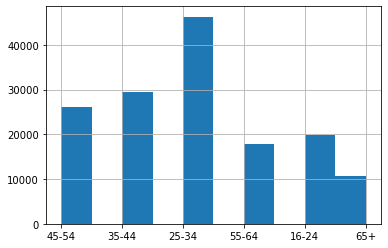

In [51]:
Age_b = df.Age_Band.hist()

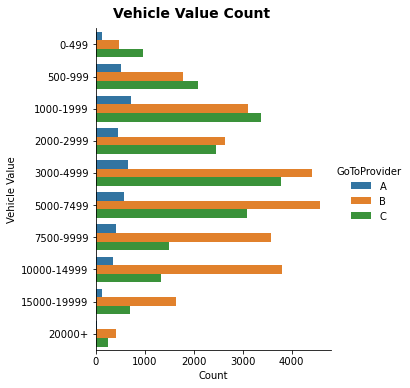

In [52]:
# Study Vehicle Value Count
labels = ['0-499','500-999','1000-1999','2000-2999','3000-4999','5000-7499','7500-9999',
          '10000-14999',  '15000-19999', '20000+']
g = sns.catplot(data=df_clean, y='Vehicle_Value', hue="GoToProvider", 
                kind='count',order = labels,hue_order = ["A","B","C"])
g.set_axis_labels("Count", "Vehicle Value")
g.fig.suptitle('Vehicle Value Count', y=1.03, fontsize=14, fontweight='semibold');

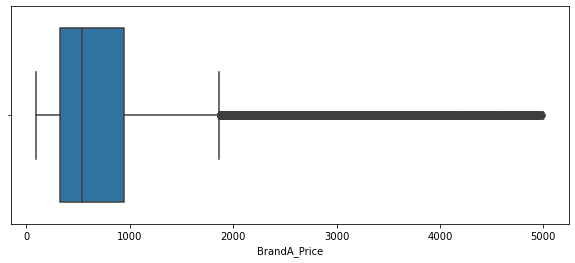

In [53]:
# Brand A price Study
plt.figure(figsize = [10, 4])       # Adjust figure size
base_color = sns.color_palette()[0] # Adjust figure colour
sns.boxplot(data=df_clean, x='BrandA_Price', color=base_color);

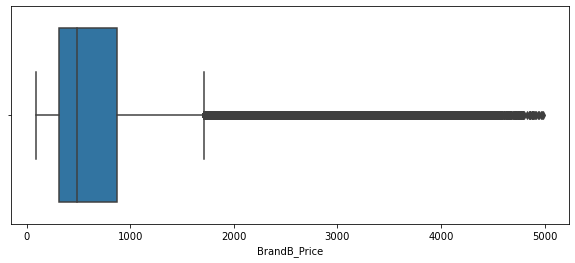

In [54]:
# Brand B price Study
plt.figure(figsize = [10, 4])       # Adjust figure size
base_color = sns.color_palette()[0] # Adjust figure colour
sns.boxplot(data=df_clean, x='BrandB_Price', color=base_color);

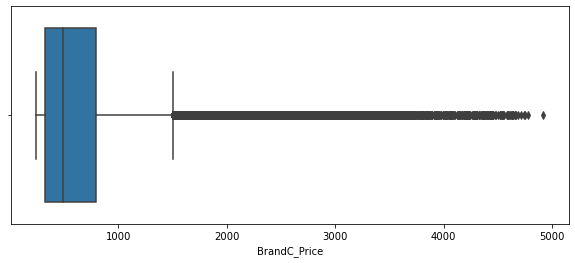

In [55]:
# Brand C price Study
plt.figure(figsize = [10, 4])       # Adjust figure size
base_color = sns.color_palette()[0] # Adjust figure colour
sns.boxplot(data=df_clean, x='BrandC_Price', color=base_color);

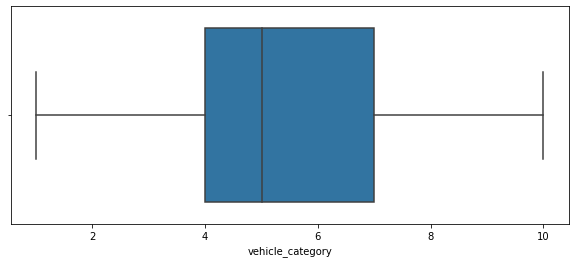

In [56]:
# Vehicle category study 
plt.figure(figsize = [10, 4])       # Adjust figure size
base_color = sns.color_palette()[0] # Adjust figure colour
sns.boxplot(data=df_clean, x='vehicle_category', color=base_color);

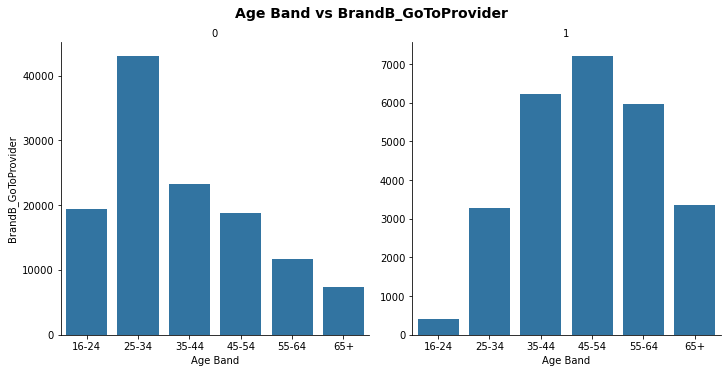

In [57]:
# Study Age Band vs BrandB_GoToProvider 
labels = ['16-24','25-34', '35-44','45-54' , '55-64', '65+']
g = sns.catplot(data=df_clean, x='Age_Band', col="BrandB_GoToProvider", kind='count', sharey = False,
            color = base_color, order = labels)
g.set_axis_labels("Age Band", "BrandB_GoToProvider")
g.set_titles("{col_name}")
g.fig.suptitle('Age Band vs BrandB_GoToProvider', y=1.03, fontsize=14, fontweight='semibold');

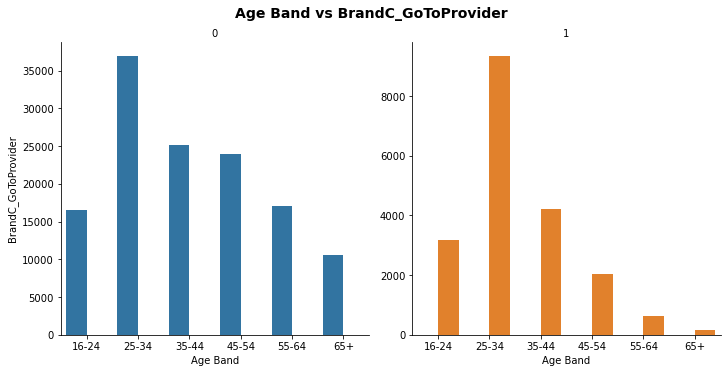

In [58]:
# Study Age Band vs BrandC_GoToProvider 
labels = ['16-24','25-34', '35-44','45-54' , '55-64', '65+']
g = sns.catplot(data=df_clean, x='Age_Band', col="BrandC_GoToProvider",hue='BrandC_GoToProvider', kind='count', sharey = False,
             order = labels)
g.set_axis_labels("Age Band", "BrandC_GoToProvider")
g.set_titles("{col_name}")
g.fig.suptitle('Age Band vs BrandC_GoToProvider', y=1.03, fontsize=14, fontweight='semibold');